# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import pickle
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [20]:
item = 'SUGAR'
file = item + '.pickle'

with open(file, 'rb') as handle:
    prices = pickle.load(handle)

prices.Month = pd.to_datetime(prices.Month)
prices = prices.set_index('Month')    

In [21]:
prices.head()

,Price
Month,
2012-01-01,55.75
2012-02-01,58.25
2012-03-01,59.50
2012-04-01,59.31
2012-05-01,54.29


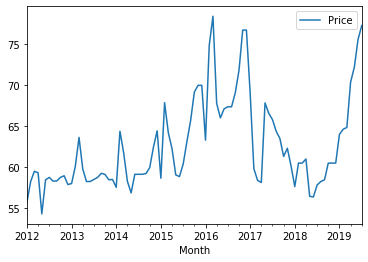

In [22]:
prices.plot()

In [23]:
X = prices.values
train = X[0:80]
test = X[80:91] 
predictions = []

In [24]:
months = ["2018-09-01","2018-10-01","2018-11-01","2018-12-01","2019-01-01","2019-02-01","2019-03-01","2019-04-01","2019-05-01","2019-06-01","2019-07-01"]
price = prices.Price.tolist()
price = price[80:91]

# ARIMA model

In [ ]:
from sklearn.metrics import mean_absolute_error
p=q=range(0,5)
d=range(0,1)
pdq = list(itertools.product(p,d,q))
best = 0
loss = 10000

for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        predictions = model_arima_fit.forecast(steps=11)[0]
        l = mean_absolute_error(price, predictions)
        print("Parameters: " + str(param), "AIC: " + str(model_arima_fit.aic), "Loss: " + str(l))
        if l < loss:
            loss = l
            best = param
    except:
        continue        

Parameters: (0, 0, 0) AIC: 494.0720904088826 Loss: 5.690034090909093
Parameters: (0, 0, 1) AIC: 449.85214918220527 Loss: 5.5905802709266945
Parameters: (0, 0, 2) AIC: 436.0993658541515 Loss: 5.42460970441545
Parameters: (0, 0, 3) AIC: 434.787445135058 Loss: 5.424798726651601
Parameters: (0, 0, 4) AIC: 434.65812800880065 Loss: 5.351802211867679
Parameters: (1, 0, 0) AIC: 425.9279429127971 Loss: 5.627618341947913
Parameters: (1, 0, 1) AIC: 427.4534153796559 Loss: 5.477567623262758
Parameters: (1, 0, 2) AIC: 426.8103863578406 Loss: 6.898929901796972
Parameters: (1, 0, 3) AIC: 426.92273166302436 Loss: 6.766296333898439
Parameters: (2, 0, 0) AIC: 427.6010871719602 Loss: 5.504421870109318
Parameters: (2, 0, 1) AIC: 429.2694067531181 Loss: 5.514969013765813


In [ ]:
model_arima = ARIMA(train,order=best)
model_arima_fit = model_arima.fit()
predictions = model_arima_fit.forecast(steps=11)[0]
print("Best Parameters: " + str(best))

bias = 0.01
for i in range(predictions.size):
    predictions[i] = predictions[i] + predictions[i]*(bias)
    bias = bias + 0.015

plt.plot(test)
plt.plot(predictions,color='red',label='Forecast')

In [ ]:
dict = {'Month': months, 'Price': price, 'Predictions': predictions}     
df = pd.DataFrame(dict) 
df

In [ ]:
print("Loss: " + str(mean_absolute_error(price, predictions)))